In [1]:
#this will print some high-level  stats on a user's account

In [2]:
from keys import client_id, secret_key, username, user_agent, password
import praw
from datetime import datetime as dt
import matplotlib.pyplot as plt

In [3]:
reddit = praw.Reddit(client_id=client_id, client_secret=secret_key,username=username,password=password,user_agent=user_agent)

Version 7.5.0 of praw is outdated. Version 7.6.0 was released 2 hours ago.


In [4]:
redditor_name = input("Enter a redditor name: ")
# redditor_name = ""

In [5]:
def get_post_count(post_instance):
    post_count = 0
    for post in post_instance:
        post_count += 1
    return post_count

In [6]:
def get_comment_count(comment_instance):
    comment_count = 0
    for comment in comment_instance:
        comment_count += 1
    return comment_count

In [7]:
def get_posts_per_day(post_instance, post_count):
    dates = []
    unique_dates = []
    for post in post_instance:
        dates.append(dt.utcfromtimestamp(post.created_utc).date())
    for date in dates:
        if date not in unique_dates:
            unique_dates.append(date)
    ppd = round(post_count / len(unique_dates),2)
    return ppd


In [8]:
def get_posting_habits(post_instance):
    subreddits = []
    for post in post_instance:
        subreddits.append(post.subreddit.display_name)
    unique_subs = []
    for sub in subreddits:
        if sub not in unique_subs:
            unique_subs.append(sub)
    sub_counts = []
    for sub in unique_subs:
        counter = 0
        for i in subreddits:
            if sub == i:
                counter += 1
        sub_counts.append(counter)
    combined = list(zip(unique_subs, sub_counts))
    combined.sort(key=lambda x: x[1], reverse=True)
    plt.figure(figsize=(10,5))
    plt.bar([x[0] for x in combined[:5]], [x[1] for x in combined[:5]], align='center')
    plt.title("Subreddits with the most posts")
    plt.show()

In [9]:
def get_account_details(redditor_name):
    redditor_obj = reddit.redditor(redditor_name)
    print("Redditor name:", redditor_obj.name)
    print("Redditor account created:", dt.utcfromtimestamp(redditor_obj.created_utc))
    print("Post Karma: ", redditor_obj.link_karma)
    print("Comment Karma: ", redditor_obj.comment_karma)
    print("Number of comments:", get_comment_count(redditor_obj.comments.new(limit=None)))
    post_count = get_post_count(redditor_obj.submissions.new(limit=None))
    print("Number of posts:", post_count)
    print("Posts per day:", get_posts_per_day(redditor_obj.submissions.new(limit=None), post_count))
    if post_count == 1000:
        print("*****Only last 1000 posts were analyzed*****")
    get_posting_habits(redditor_obj.submissions.new(limit=None))

Redditor name: saurin212
Redditor account created: 2020-11-01 04:19:18
Post Karma:  177960
Comment Karma:  1709
Number of comments: 1000
Number of posts: 1000
Posts per day: 43.48
*****Only last 1000 posts were analyzed*****


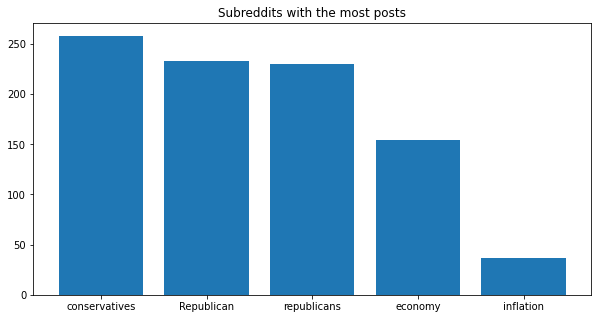

In [10]:
get_account_details(redditor_name)
# get_account_details("saurin212")